<a href="https://colab.research.google.com/github/Bhuvanjeet/Graduate-Rotational-Internship-TSF/blob/main/GRIP_Task_2_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation - Graduate Rotational Internship Program (GRIP)**

![TSF Logo](https://drive.google.com/uc?export=view&id=1Dclq9OlAsBES7hRc-vYTBZFbo_OIZfg8)

**Task - 2**

**By: - Bhuvanjeet Singh Gandhi**

**Prediction using Unsupervised ML**

**To predict the optimum number of clusters and represent it visually, from the given ‘Iris’ dataset.**

**Notebook Overview:**

**1. Exploratory Data Analysis**

**2. Data Preparation - for ML model**

**3. Finding the optimum number of clusters - Elbow Method**

**4. K-Means Algorithm**

**5. Results , Evaluation and Metrics**


**Exploratory Data Analysis - EDA**

In [46]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
from sklearn import datasets
iris=datasets.load_iris()
#converting data which is a numpy array to DataFrame
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns = ['Target'])

In [48]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
df_target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [50]:
df_target.value_counts()

Target
2         50
1         50
0         50
dtype: int64

In [51]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


**Data Preparation - for ML model**

In [52]:
X=df.iloc[:,:].values
y = df_target.iloc[:, 0].values

**Finding the optimum number of clusters - Elbow Method**

In [53]:
from sklearn.cluster import KMeans
history=[]    #to store WCSS - within cluster sum of squares
for i in range(1,15):
  km=KMeans(n_clusters=i,random_state=0)
  km.fit(X)
  history.append(km.inertia_)   #'km.inertia_' sinds the sum of squared distances of samples to their closest cluster center.
  y_pred=km.predict(X)

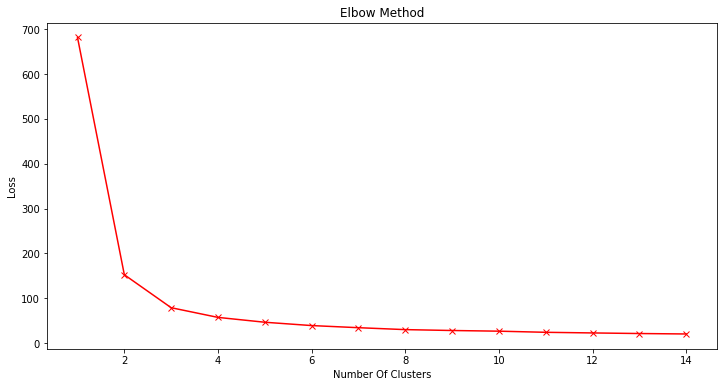

In [61]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),history,marker="x",c="r")
plt.xlabel('Number Of Clusters')
plt.ylabel('Loss')
plt.title('Elbow Method')
plt.show()

From the above graph, we can infer that there is no significance decrease of the value of within cluster sum of squares (WCSS) from the value of K=3. Hence the optimal number of clusters as obtained from the "Elbow Method" is 3.

**K-Means Algorithm**

In [55]:
km=KMeans(n_clusters=3,init = 'k-means++',random_state=42,max_iter=300)
km.fit(X)
y_kmeans=km.predict(X)
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

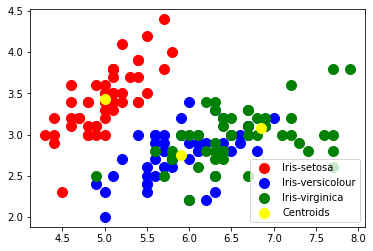

In [56]:
# plotting using the classes based on the targets specified in the dataset
# Visualising the clusters - On the first two columns 
# (since we can't plot all the 4 dimensions on a single plot) and color attribute to specify the class of that particular object.
plt.scatter(X[y == 0, 0], X[y == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

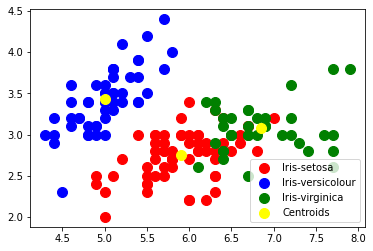

In [57]:
# plotting using the classes predicted by the k-means classifier
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Thus, the above graphs are quite similar in terms of grouping the similar kind of flowers which means classifier is predicting the category of the flower with good accuracy, given the 4 input features.

Also, we can see that the model is finding difficult to differentiate between the 'Iris-setosa' and the 'Iris-virginica' categories of the flowers in the given dataset since they look quite overlapped.

**Results , Evaluation and Metrics**

In [58]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics 
iris_k_mean = KMeans(n_clusters=3)
iris_k_mean.fit(X)
predict_y = np.choose(iris_k_mean.labels_ , [1,0,2]).astype(np.int64)
print("Accuracy:",metrics.accuracy_score(predict_y, y))

Accuracy: 0.8933333333333333


Thus, the accuracy achieved by clustering is around 89% .